# Data Exploration

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#%matplotlib inline 是在 Jupyter Notebook 或 JupyterLab 中使用的魔術命令，用於顯示 matplotlib 繪製的圖表。
#這個命令會讓圖表直接嵌入在 Notebook 的輸出單元格中，而不是彈出一個新的視窗。
%matplotlib inline
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

df = pd.read_csv('./dataset/pima-indians-diabetes.data.csv', names=names)
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [11]:
df.describe(include='all') #統計整理過後的資料

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


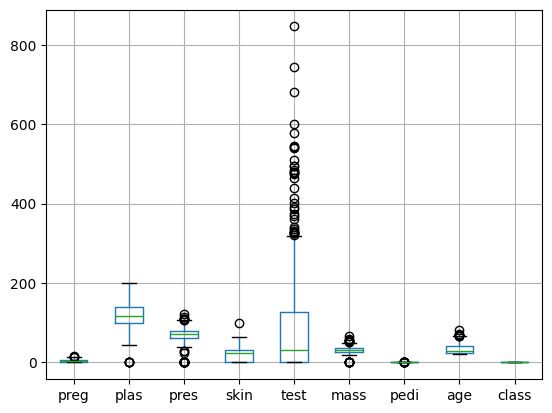

In [20]:
#pandas取用matplotlib套件用法
#df.plot() 或 df.plot.line()：預設的繪圖類型是折線圖，適合展示數據的變化趨勢。
#df.plot.bar()：用於繪製垂直柱狀圖。
#df.plot.barh()：用於繪製水平柱狀圖。
#df.plot.hist()：展示數據的分布情況，特別適合數值型資料。
#df.boxplot()：展示數據的四分位數範圍、極值和異常值。
#df.plot.scatter(x='column1', y='column2')：展示兩個變數之間的關係，適合數值型資料。
#df.plot.area()：展示不同數據在同一範疇下的累積或比例分布。
#df.plot.pie(y='column_name')：展示各類別所佔比例，通常適合單一欄位的分類數據。
#df.plot.kde()：用於展示數據的分布密度。
#df.plot.hexbin(x='column1', y='column2', gridsize=20)：展示兩個數值型變數間的點密度。

df.boxplot()
plt.show()

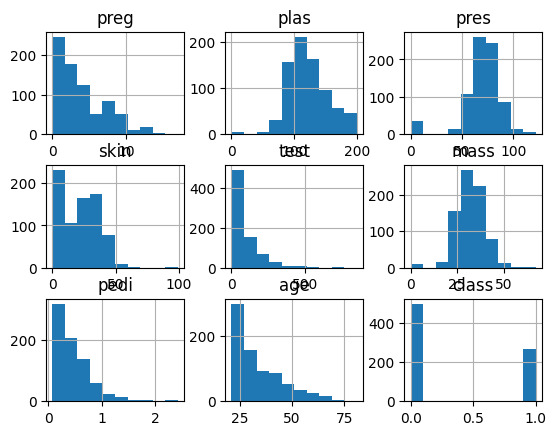

In [29]:
df.hist()

plt.show()

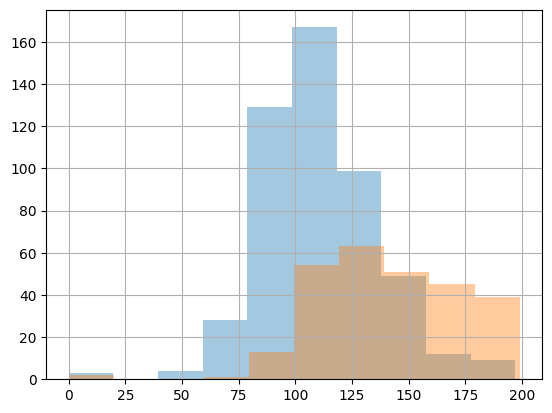

In [37]:
#是根據 class 欄位分組，對 plas 欄位的數值進行畫圖後繪製直方圖。alpha=0.4 設置了透明度。
#df.groupby('class').head(3)
df.groupby('class').plas.hist(alpha=0.4)
#class為1，plas的圖;class為0，plas的圖
plt.show()

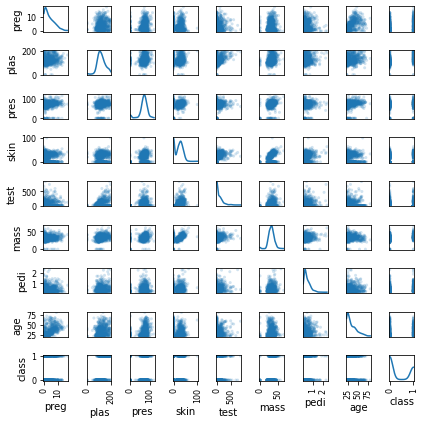

In [7]:
from pandas.plotting import scatter_matrix
#該函數可以幫助我們繪製散佈矩陣（scatter matrix），也稱為「散點矩陣圖」。
#這種圖表主要是用於觀察數據集中不同變量之間的關係，尤其是多個特徵之間的關聯性和分布狀況。
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.tight_layout()

C:\Users\user\AppData\Local\Temp\ipykernel_1960\3748496813.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


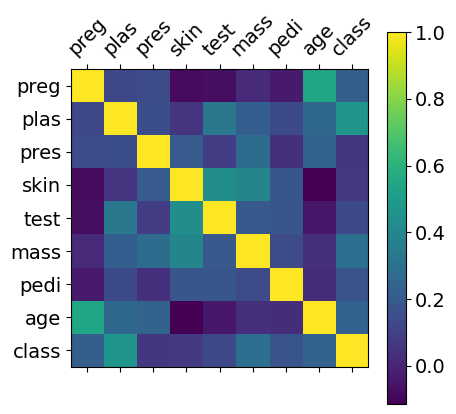

In [38]:
plt.matshow(df.corr())#根據DF算出個特徵間的相關，再透過plt劃出矩陣圖
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.tight_layout()
plt.show()


# Feature Cleaning

In [39]:
import pandas as pd
use_cols = [
    'Pclass', 'Sex', 'Age', 'Fare', 'SibSp',
    'Survived'
]

df = pd.read_csv('./dataset/titanic.csv', usecols=use_cols) #只抓出特定的columny資料
print(df.shape)
df.head()

(891, 6)


,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500


In [41]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Fare          0
dtype: int64

In [ ]:
# Listwise deletion
df_no_missing = df.dropna() #移除資料有null的row
print(df_no_missing.shape)
df_no_missing.isnull().sum()

(714, 6)


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
dtype: int64

In [45]:
# Arbitrary Value Imputation
print('fill missing value with arbitrary value')
df_av_imputation = df.copy() 
df_av_imputation["Age"] = df_av_imputation["Age"].fillna(0)#將由null的用0取代
df_av_imputation.head(10)

fill missing value with arbitrary value


,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500
5,0,3,male,0.0,0,8.4583
6,0,1,male,54.0,0,51.8625
7,0,3,male,2.0,3,21.0750
8,1,3,female,27.0,0,11.1333
9,1,2,female,14.0,1,30.0708


In [46]:
# Arbitrary Value Imputation
print('fill missing value with Mean/Median/Mode value')
df_mean_imputation = df.copy() 
df_median_imputation = df.copy() 
df_mode_imputation = df.copy() 

fill missing value with Mean/Median/Mode value


In [47]:
df_mean_imputation["Age"]=df_mean_imputation["Age"].fillna(df["Age"].mean())
df_mean_imputation.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.000000,1,7.2500
1,1,1,female,38.000000,1,71.2833
2,1,3,female,26.000000,0,7.9250
3,1,1,female,35.000000,1,53.1000
4,0,3,male,35.000000,0,8.0500
5,0,3,male,29.699118,0,8.4583
6,0,1,male,54.000000,0,51.8625
7,0,3,male,2.000000,3,21.0750
8,1,3,female,27.000000,0,11.1333
9,1,2,female,14.000000,1,30.0708


In [48]:
df_median_imputation["Age"]=df_median_imputation["Age"].fillna(df["Age"].median())
df_median_imputation.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500
5,0,3,male,28.0,0,8.4583
6,0,1,male,54.0,0,51.8625
7,0,3,male,2.0,3,21.0750
8,1,3,female,27.0,0,11.1333
9,1,2,female,14.0,1,30.0708


In [52]:
df_mode_imputation["Age"]=df_mode_imputation["Age"].fillna(df["Age"].mode()[0]) #眾數
df_mode_imputation.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500
5,0,3,male,24.0,0,8.4583
6,0,1,male,54.0,0,51.8625
7,0,3,male,2.0,3,21.0750
8,1,3,female,27.0,0,11.1333
9,1,2,female,14.0,1,30.0708


In [55]:
# End of distribution Imputation
# mean + 3*std
print('fill missing value with end of distribution imputation')
df_eof_imputation = df.copy() 
df_eof_imputation["Age"]=df_eof_imputation["Age"].fillna(df["Age"].mean()+3*df["Age"].std())
df_eof_imputation.head(10)

fill missing value with end of distribution imputation


,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.00000,1,7.2500
1,1,1,female,38.00000,1,71.2833
2,1,3,female,26.00000,0,7.9250
3,1,1,female,35.00000,1,53.1000
4,0,3,male,35.00000,0,8.0500
5,0,3,male,73.27861,0,8.4583
6,0,1,male,54.00000,0,51.8625
7,0,3,male,2.00000,3,21.0750
8,1,3,female,27.00000,0,11.1333
9,1,2,female,14.00000,1,30.0708


In [18]:
# detect outlier 
import numpy as np
import pandas as pd
use_cols = [
    'Pclass', 'Sex', 'Age', 'Fare', 'SibSp',
    'Survived'
]


data = pd.read_csv('./dataset/titanic.csv', usecols=use_cols)
data.head(3)
print(data.shape)

(891, 6)


In [19]:
# detect outlier:  Detect by arbitrary boundary
def outlier_detect_arbitrary(data,col,upper_fence,lower_fence):
    '''
    identify outliers based on arbitrary boundaries passed to the function.
    '''
    #用來判斷異常值的上限與下限

    para = (upper_fence, lower_fence)
    tmp = pd.concat([data[col]>upper_fence,data[col]<lower_fence],axis=1)
    #將任何判斷為異常值的記錄下來
    outlier_index = tmp.any(axis=1)
    print('Num of outlier detected:',outlier_index.value_counts()[1])
    print('Proportion of outlier detected',outlier_index.value_counts()[1]/len(outlier_index))    
    return outlier_index, para

index,para = outlier_detect_arbitrary(data=data,col='Fare',upper_fence=300,lower_fence=5)
print('Upper bound:',para[0],'\nLower bound:',para[1])
# check the 19 found outliers
data.loc[index,'Fare'].sort_values()

Num of outlier detected: 19
Proportion of outlier detected 0.02132435465768799
Upper bound: 300 
Lower bound: 5


179      0.0000
806      0.0000
732      0.0000
674      0.0000
633      0.0000
597      0.0000
815      0.0000
466      0.0000
481      0.0000
302      0.0000
277      0.0000
271      0.0000
263      0.0000
413      0.0000
822      0.0000
378      4.0125
679    512.3292
737    512.3292
258    512.3292
Name: Fare, dtype: float64

In [20]:
# detect outlier: IQR method
def outlier_detect_IQR(data,col,threshold=3):
    '''
    outlier detection by Interquartile Ranges Rule, also known as Tukey's test. 
    calculate the IQR ( 75th quantile - 25th quantile) 
    and the 25th 75th quantile. 
    Any value beyond:
        upper bound = 75th quantile + （IQR * threshold）
        lower bound = 25th quantile - （IQR * threshold）   
    are regarded as outliers. Default threshold is 3.
    '''
     
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    Lower_fence = data[col].quantile(0.25) - (IQR * threshold)
    Upper_fence = data[col].quantile(0.75) + (IQR * threshold)
    para = (Upper_fence, Lower_fence)
    tmp = pd.concat([data[col]>Upper_fence,data[col]<Lower_fence],axis=1)
    outlier_index = tmp.any(axis=1)
    print('Num of outlier detected:',outlier_index.value_counts()[1])
    print('Proportion of outlier detected',outlier_index.value_counts()[1]/len(outlier_index))
    return outlier_index, para

index,para = outlier_detect_IQR(data=data,col='Fare',threshold=5)
print('Upper bound:',para[0],'\nLower bound:',para[1])
# check the 31 found outliers
data.loc[index,'Fare'].sort_values()

Num of outlier detected: 31
Proportion of outlier detected 0.03479236812570146
Upper bound: 146.448 
Lower bound: -107.53760000000001


31     146.5208
195    146.5208
305    151.5500
708    151.5500
297    151.5500
498    151.5500
609    153.4625
332    153.4625
268    153.4625
318    164.8667
856    164.8667
730    211.3375
779    211.3375
689    211.3375
377    211.5000
527    221.7792
700    227.5250
716    227.5250
557    227.5250
380    227.5250
299    247.5208
118    247.5208
311    262.3750
742    262.3750
341    263.0000
88     263.0000
438    263.0000
27     263.0000
679    512.3292
258    512.3292
737    512.3292
Name: Fare, dtype: float64

In [21]:
# detect outlier: Mean and Standard Deviation Method

def outlier_detect_mean_std(data,col,threshold=3):
    '''
    outlier detection by Mean and Standard Deviation Method.
    If a value is a certain number(called threshold) of standard deviations away 
    from the mean, that data point is identified as an outlier. 
    Default threshold is 3.

    This method can fail to detect outliers because the outliers increase the standard deviation. 
    The more extreme the outlier, the more the standard deviation is affected.
    '''
   
    Upper_fence = data[col].mean() + threshold * data[col].std()
    Lower_fence = data[col].mean() - threshold * data[col].std()   
    para = (Upper_fence, Lower_fence)   
    tmp = pd.concat([data[col]>Upper_fence,data[col]<Lower_fence],axis=1)
    outlier_index = tmp.any(axis=1)
    print('Num of outlier detected:',outlier_index.value_counts()[1])
    print('Proportion of outlier detected',outlier_index.value_counts()[1]/len(outlier_index))
    return outlier_index, para

index,para = outlier_detect_mean_std(data=data,col='Fare',threshold=3)
print('Upper bound:',para[0],'\nLower bound:',para[1])
# check the 20 found outliers
data.loc[index,'Fare'].sort_values()

Num of outlier detected: 20
Proportion of outlier detected 0.02244668911335578
Upper bound: 181.2844937601173 
Lower bound: -116.87607782296804


779    211.3375
730    211.3375
689    211.3375
377    211.5000
527    221.7792
716    227.5250
700    227.5250
380    227.5250
557    227.5250
118    247.5208
299    247.5208
311    262.3750
742    262.3750
27     263.0000
341    263.0000
88     263.0000
438    263.0000
258    512.3292
737    512.3292
679    512.3292
Name: Fare, dtype: float64

In [22]:
# detect outlier: MAD method
def outlier_detect_MAD(data,col,threshold=3.5):
    """
    outlier detection by Median and Median Absolute Deviation Method (MAD)
    The median of the residuals is calculated. Then, the difference is calculated between each historical value and this median. 
    These differences are expressed as their absolute values, and a new median is calculated and multiplied by 
    an empirically derived constant to yield the median absolute deviation (MAD). 
    If a value is a certain number of MAD away from the median of the residuals, 
    that value is classified as an outlier. The default threshold is 3 MAD.
    
    This method is generally more effective than the mean and standard deviation method for detecting outliers, 
    but it can be too aggressive in classifying values that are not really extremely different. 
    Also, if more than 50% of the data points have the same value, MAD is computed to be 0, 
    so any value different from the residual median is classified as an outlier.
    """
    
    median = data[col].median()
    median_absolute_deviation = np.median([np.abs(y - median) for y in data[col]])
    modified_z_scores = pd.Series([0.6745 * (y - median) / median_absolute_deviation for y in data[col]])
    outlier_index = np.abs(modified_z_scores) > threshold
    print('Num of outlier detected:',outlier_index.value_counts()[1])
    print('Proportion of outlier detected',outlier_index.value_counts()[1]/len(outlier_index))
    return outlier_index

# too aggressive for our dataset, about 18% of cases are detected as outliers.
index = outlier_detect_MAD(data=data,col='Fare',threshold=3.5)
data.loc[index,'Fare'].sort_values()

Num of outlier detected: 160
Proportion of outlier detected 0.17957351290684623


867     50.4958
571     51.4792
6       51.8625
457     51.8625
669     52.0000
         ...   
27     263.0000
438    263.0000
737    512.3292
679    512.3292
258    512.3292
Name: Fare, Length: 160, dtype: float64

In [23]:
# handle outlier: impute_outlier_with_arbitrary
def impute_outlier_with_arbitrary(data,outlier_index,value,col=[]):
    """
    impute outliers with arbitrary value
    """
    
    data_copy = data.copy(deep=True)
    for i in col:
        data_copy.loc[outlier_index,i] = value
    return data_copy
index,para = outlier_detect_arbitrary(data=data,col='Fare',upper_fence=300,lower_fence=5)
print('Upper bound:',para[0],'\nLower bound:',para[1])
print('before handling outlier:')
print(data[255:275])
print('after handling outlier:')
data2 = impute_outlier_with_arbitrary(data=data,outlier_index=index, value=-999,col=['Fare'])
print(data2[255:275])

Num of outlier detected: 19
Proportion of outlier detected 0.02132435465768799
Upper bound: 300 
Lower bound: 5
before handling outlier:
     Survived  Pclass     Sex   Age  SibSp      Fare
255         1       3  female  29.0      0   15.2458
256         1       1  female   NaN      0   79.2000
257         1       1  female  30.0      0   86.5000
258         1       1  female  35.0      0  512.3292
259         1       2  female  50.0      0   26.0000
260         0       3    male   NaN      0    7.7500
261         1       3    male   3.0      4   31.3875
262         0       1    male  52.0      1   79.6500
263         0       1    male  40.0      0    0.0000
264         0       3  female   NaN      0    7.7500
265         0       2    male  36.0      0   10.5000
266         0       3    male  16.0      4   39.6875
267         1       3    male  25.0      1    7.7750
268         1       1  female  58.0      0  153.4625
269         1       1  female  35.0      0  135.6333
270         0  

In [24]:
# handle outlier: windsorization 
def windsorization(data,col,para,strategy='both'):
    """
    top-coding & bottom coding (capping the maximum of a distribution at an arbitrarily set value,vice versa)
    """
    
    data_copy = data.copy(deep=True)  
    if strategy == 'both':
        data_copy.loc[data_copy[col]>para[0],col] = para[0]
        data_copy.loc[data_copy[col]<para[1],col] = para[1]
    elif strategy == 'top':
        data_copy.loc[data_copy[col]>para[0],col] = para[0]
    elif strategy == 'bottom':
        data_copy.loc[data_copy[col]<para[1],col] = para[1]  
    return data_copy

# use any of the detection method above
index,para = outlier_detect_arbitrary(data,'Fare',300,5)
print('Upper bound:',para[0],'\nLower bound:',para[1])
print('before handling outlier:')
print(data[255:275])
print('after handling outlier:')
# see index 258,263,271 have been replaced with top/bottom coding
data3 = windsorization(data=data,col='Fare',para=para,strategy='both')
print(data3[255:275])

Num of outlier detected: 19
Proportion of outlier detected 0.02132435465768799
Upper bound: 300 
Lower bound: 5
before handling outlier:
     Survived  Pclass     Sex   Age  SibSp      Fare
255         1       3  female  29.0      0   15.2458
256         1       1  female   NaN      0   79.2000
257         1       1  female  30.0      0   86.5000
258         1       1  female  35.0      0  512.3292
259         1       2  female  50.0      0   26.0000
260         0       3    male   NaN      0    7.7500
261         1       3    male   3.0      4   31.3875
262         0       1    male  52.0      1   79.6500
263         0       1    male  40.0      0    0.0000
264         0       3  female   NaN      0    7.7500
265         0       2    male  36.0      0   10.5000
266         0       3    male  16.0      4   39.6875
267         1       3    male  25.0      1    7.7750
268         1       1  female  58.0      0  153.4625
269         1       1  female  35.0      0  135.6333
270         0  

In [25]:
# handle outlier: drop outlier
def drop_outlier(data,outlier_index):
    """
    drop the cases that are outliers
    """
    
    data_copy = data[~outlier_index]
    return data_copy
# use any of the detection method above
index,para = outlier_detect_arbitrary(data,'Fare',300,5)
print('Upper bound:',para[0],'\nLower bound:',para[1])

# drop the outlier.
# we can see no more observations have value >300 or <5. They've been removed.
data4 = drop_outlier(data=data,outlier_index=index)
print(data4.Fare.max())
print(data4.Fare.min())

Num of outlier detected: 19
Proportion of outlier detected 0.02132435465768799
Upper bound: 300 
Lower bound: 5
263.0
5.0


In [26]:
# handle outlier: impute with mean 
def impute_outlier_with_avg(data,col,outlier_index,strategy='mean'):
    """
    impute outlier with mean/median/most frequent values of that variable.
    """
    
    data_copy = data.copy(deep=True)
    if strategy=='mean':
        data_copy.loc[outlier_index,col] = data_copy[col].mean()
    elif strategy=='median':
        data_copy.loc[outlier_index,col] = data_copy[col].median()
    elif strategy=='mode':
        data_copy.loc[outlier_index,col] = data_copy[col].mode()[0]   
        
    return data_copy
# use any of the detection method above
index,para = outlier_detect_arbitrary(data,'Fare',300,5)
print('Upper bound:',para[0],'\nLower bound:',para[1])
# see index 258,263,271 have been replaced with mean

data5 = impute_outlier_with_avg(data=data,col='Fare',
                                   outlier_index=index,strategy='mean')
print(data5[255:275])

Num of outlier detected: 19
Proportion of outlier detected 0.02132435465768799
Upper bound: 300 
Lower bound: 5
     Survived  Pclass     Sex   Age  SibSp        Fare
255         1       3  female  29.0      0   15.245800
256         1       1  female   NaN      0   79.200000
257         1       1  female  30.0      0   86.500000
258         1       1  female  35.0      0   32.204208
259         1       2  female  50.0      0   26.000000
260         0       3    male   NaN      0    7.750000
261         1       3    male   3.0      4   31.387500
262         0       1    male  52.0      1   79.650000
263         0       1    male  40.0      0   32.204208
264         0       3  female   NaN      0    7.750000
265         0       2    male  36.0      0   10.500000
266         0       3    male  16.0      4   39.687500
267         1       3    male  25.0      1    7.775000
268         1       1  female  58.0      0  153.462500
269         1       1  female  35.0      0  135.633300
270     